In [1]:
299792458*4e-6

1199.169832

In [16]:
sys.path.append(r'H:\My Documents\scripts')

In [24]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline

d:\measuring\data


In [7]:
folder = r'X:\data\20160525\184753_length_scan_FSR_-2-10V_high_intensity_morepoints'
fp=tb.get_msmt_fp(folder)

In [8]:
f =h5py.File(fp)

In [22]:
ks=f.keys()
g=f[ks[1]]
g.keys()

[u'PD_signal', u'piezo_voltage']

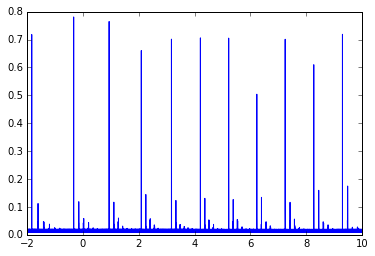

In [28]:
y = g['PD_signal'].value
x=g['piezo_voltage'].value
plt.plot(x,y)

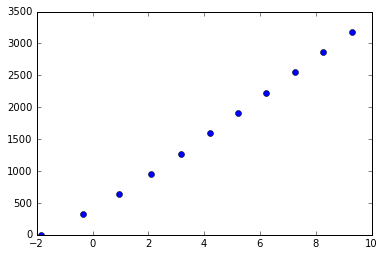

In [34]:
zeromodes = x[y>0.5]
l=637
res=np.arange(len(zeromodes))*l/2.
plt.plot(zeromodes,res, 'o')



In [37]:
xfit=zeromodes[zeromodes>0]
yfit = np.arange(len(xfit))*l/2.
f = common.fit_line
guess = [0,300]
fitres = fit.fit1d(xfit,yfit,f,*guess, ret=True, do_plot=True, do_print=True)

Converged with chi squared  1949.50059902
degrees of freedom, dof  7
RMS of residuals (i.e. sqrt(chisq/dof))  16.6883218322
Reduced chisq (i.e. variance of residuals)  278.500085574

fitted parameters at minimum, with 68% C.I.:
 0 a           -319.470996 +/-  12.131156
 1 b            307.269684 +/-   2.078820

correlation matrix:
               a         b         
         a  1.000000
         b -0.888667  1.000000



d:/measuring\analysis\lib\fitting\fit.py:91: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if not success or cov == None: # FIXME: find a better solution!!!


In [ ]:
fitres = fit.fit1d

In [42]:
from analysis.lib.nv import detection
detection.get_Ey_vs_strain_saturation(4,1.2*1250e3)

eta, pflip: 0.208216216216 0.0163636363636


(0.9414192475044791, 12.724324324324325)

In [36]:
from analysis.lib.nv import nvlevels
nvlevels.get_ES_ExEy(68.16,72.25)

transitions kw deprecated, use function get_transitions instead


array([ 62.99396005,  63.10070981,  68.15529468,  72.24357007,
        72.93874527,  75.91372012])

In [1]:
from scipy.stats import fisher_exact

In [6]:
fisher_exact(np.array([[343,441],[530,550]]))

(0.80712788259958068, 0.024061101048130428)

In [45]:
detection.get_SSRO_stats(detection.get_pflip(2),detection.get_eta(1350e3))

(0.9428264157082006, 13.42520107238606)

In [150]:
from analysis.lib.nv import nvlevels
reload(nvlevels)
from analysis.lib.nv import detection
reload(detection)

<module 'analysis.lib.nv.detection' from 'analysis\lib\nv\detection.pyc'>

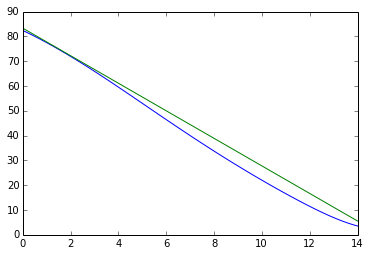

In [184]:
strain_splitting=0.
pts=100
x = np.linspace(0,14,pts)
y1=zeros(pts)
y2=zeros(pts)
for i,strain_splitting in enumerate(x):
    ytmp = 0
    #for angle in np.linspace(0,120,pts):
    #    ytmp = ytmp + (1-nvlevels.get_ms0_fraction(strain_splitting,2,theta_x=angle))+0.01
    y1[i]=1./(1-nvlevels.get_ms0_fraction(strain_splitting,2,theta_x=20)+0.0095)
    y2[i] = 1./detection.get_pflip_Ey(strain_splitting)
plt.plot(x,y1)
plt.plot(x,y2)

In [53]:
strain_splitting=2.
w,v=nvlevels.get_ES(E_field=[strain_splitting/2.,0,0],Ee0=0-1.94,transitions=False)

In [73]:
w2,v2=np.sort(w),np.transpose(v)[numpy.argsort(w)]

In [104]:
strain_splitting/2*np.sin(90/180.*np.pi)

1.0

In [70]:
v

matrix([[  9.95878326e-01+0.j,   8.15181484e-02+0.j,   3.97636853e-02+0.j,
           4.66022331e-15+0.j,  -8.96622337e-19+0.j,  -2.84109950e-18-0.j],
        [ -3.02270645e-17-0.j,  -7.29001028e-18-0.j,  -4.86905938e-17-0.j,
           9.91936786e-01+0.j,  -1.08608227e-01+0.j,   6.53120699e-02+0.j],
        [ -4.00776049e-02-0.j,   2.21764066e-03+0.j,   9.99194109e-01+0.j,
          -2.00606027e-16+0.j,   4.89222096e-18+0.j,  -1.70367540e-18-0.j],
        [  1.13662087e-18+0.j,  -7.75177137e-18-0.j,   3.86540345e-17+0.j,
          -6.60774405e-02+0.j,  -3.45927102e-03+0.j,   9.97808501e-01+0.j],
        [ -4.57631655e-18-0.j,   8.03886913e-17+0.j,   1.83876715e-16+0.j,
           1.08144280e-01+0.j,   9.94078612e-01+0.j,   1.06079318e-02+0.j],
        [ -8.13642721e-02-0.j,   9.96669390e-01+0.j,  -5.47555241e-03-0.j,
          -3.16082638e-16+0.j,  -9.70994154e-18+0.j,   1.91980613e-18+0.j]])

In [71]:
np.linalg.eig?

In [76]:
np.transpose(v)

matrix([[  9.95878326e-01+0.j,  -3.02270645e-17-0.j,  -4.00776049e-02-0.j,
           1.13662087e-18+0.j,  -4.57631655e-18-0.j,  -8.13642721e-02-0.j],
        [  8.15181484e-02+0.j,  -7.29001028e-18-0.j,   2.21764066e-03+0.j,
          -7.75177137e-18-0.j,   8.03886913e-17+0.j,   9.96669390e-01+0.j],
        [  3.97636853e-02+0.j,  -4.86905938e-17-0.j,   9.99194109e-01+0.j,
           3.86540345e-17+0.j,   1.83876715e-16+0.j,  -5.47555241e-03-0.j],
        [  4.66022331e-15+0.j,   9.91936786e-01+0.j,  -2.00606027e-16+0.j,
          -6.60774405e-02+0.j,   1.08144280e-01+0.j,  -3.16082638e-16+0.j],
        [ -8.96622337e-19+0.j,  -1.08608227e-01+0.j,   4.89222096e-18+0.j,
          -3.45927102e-03+0.j,   9.94078612e-01+0.j,  -9.70994154e-18+0.j],
        [ -2.84109950e-18-0.j,   6.53120699e-02+0.j,  -1.70367540e-18-0.j,
           9.97808501e-01+0.j,   1.06079318e-02+0.j,   1.91980613e-18+0.j]])

In [24]:
cd ..

H:\My Documents\scripts


Calculating data for fidelity graph
All necessary data calculated


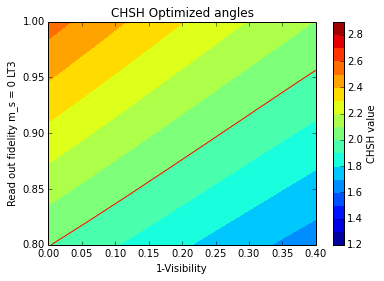

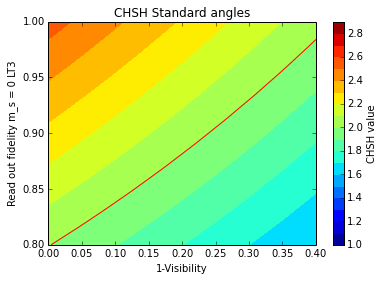

In [35]:
execfile(r'H:\My Documents\scripts\analysis\scripts\bell\Optimal_angles_just_one_angle_fixed_v2.py')

In [32]:
def C1(a,b,x,y):
    return (np.bitwise_xor((-1)**(np.bitwise_xor(a,1)*np.bitwise_xor(b,1))*x*y,1))/2.
def C2(a,b,x,y):
    return ((-1)**(a*b)*x*y+1)/2
rnd=[[0,0],[0,1],[1,0],[1,1]]
ro=[[-1,-1],[-1,1],[1,-1],[1,1]]

In [33]:
C=np.zeros((4,4))
for i,r in enumerate(rnd):
    for j,o in enumerate(ro):
        H=(r[0],r[1],o[0],o[1])
        C[i,j]=C2(*H)
print C

[[ 1.  0.  0.  1.]
 [ 1.  0.  0.  1.]
 [ 1.  0.  0.  1.]
 [ 0.  1.  1.  0.]]


In [2]:
(-1)**False

1

In [4]:
False*True

0